In [1]:
import cv2 as cv
from glob import glob
import os
import random
from ultralytics import YOLO
import matplotlib.pyplot as plt


In [2]:
# pick pre-trained model
model_pretrained = YOLO('yolov8n.pt')
# regular pre-trained yolov8 model for car recognition
# coco_model = YOLO('yolov8n.pt')
coco_model = YOLO('yolov8s.pt')

  0%|          | 0.00/6.25M [00:00<?, ?B/s]

  0%|          | 0.00/21.5M [00:00<?, ?B/s]

In [3]:
import ast

import cv2
import numpy as np
import pandas as pd


def draw_border(img, top_left, bottom_right, color=(0, 255, 0), thickness=10, line_length_x=200, line_length_y=200):
    x1, y1 = top_left
    x2, y2 = bottom_right

    cv2.line(img, (x1, y1), (x1, y1 + line_length_y), color, thickness)  #-- top-left
    cv2.line(img, (x1, y1), (x1 + line_length_x, y1), color, thickness)

    cv2.line(img, (x1, y2), (x1, y2 - line_length_y), color, thickness)  #-- bottom-left
    cv2.line(img, (x1, y2), (x1 + line_length_x, y2), color, thickness)

    cv2.line(img, (x2, y1), (x2 - line_length_x, y1), color, thickness)  #-- top-right
    cv2.line(img, (x2, y1), (x2, y1 + line_length_y), color, thickness)

    cv2.line(img, (x2, y2), (x2, y2 - line_length_y), color, thickness)  #-- bottom-right
    cv2.line(img, (x2, y2), (x2 - line_length_x, y2), color, thickness)

    return img

In [20]:
import cv2 as cv
import os
import glob
import easyocr
import re
# Initialize the OCR reader
reader = easyocr.Reader(['en'], gpu=False)

# Set up paths and create directory if it doesn't exist
testers = glob.glob('/home/hailopi/Ad-matay/samples/break/*')  # Adjust the path as needed
output_dir = 'corners'
os.makedirs(output_dir, exist_ok=True)

# Function to divide an image into a 4x4 grid, extract top-left corners, perform OCR, and label the image
def extract_and_read_corners(image_path, output_dir):
    image = cv.imread(image_path)
    if image is None:
        print(f"Error loading image {image_path}")
        return

    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate the size of each grid cell
    cell_height = height // 4
    cell_width = width // 3

    # Loop through the grid and extract the top-left corner of each cell
    for i in range(4):
        for j in range(3):
            if i == 0 and j == 0:
                # Calculate the coordinates of the top-left corner
                x1 = j * cell_width
                y1 = i * cell_height
                # Extract the top-left corner
                corner = image[y1:y1+cell_height, x1:x1+cell_width]
                
                # Construct the filename for the corner image
                base_name = os.path.basename(image_path)
                file_name = f"{os.path.splitext(base_name)[0]}_corner_{i}_{j}.jpg"
                output_path = os.path.join(output_dir, file_name)
                
                # Save the extracted corner
                # cv.imwrite(output_path, corner)
                # print(f"Saved corner {i},{j} to {output_path}")
                
                # Perform OCR on the corner
                ocr_result = reader.readtext(corner)
                
                if ocr_result:
                    for ind, detection in enumerate(ocr_result):
                        bbox, text, score = detection
                        print(f"OCR result for {text} (Confidence: {score:.2f})")
                        # Check if the text contains at least 2 digits
                        digit_count = len(re.findall(r'\d', text))
                        if digit_count >= 2:
                            # Draw bounding box around the detected text
                            (top_left, top_right, bottom_right, bottom_left) = bbox
                            top_left = tuple(map(int, top_left))
                            bottom_right = tuple(map(int, bottom_right))
                            cv.rectangle(corner, top_left, bottom_right, (0, 255, 0), 2)
                            
                            # Add the OCR text near the bounding box
                            text_position = (top_left[0], top_left[1] - 10 if top_left[1] - 10 > 10 else top_left[1] + 20)
                            cv.putText(corner, text, text_position, 
                                       cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 100, 0), 2, cv.LINE_AA)
                            
                            # Save the labeled image
                            labeled_output_path = os.path.join(output_dir, f"{os.path.splitext(file_name)[0]}_labeled.jpg")
                            cv.imwrite(labeled_output_path, corner)
                            print(f"Labeled image saved to {labeled_output_path}")
                else:
                    print(f"No OCR result for {file_name}")

# Process each image in the testers list
for image_path in testers:
    extract_and_read_corners(image_path, output_dir)


Using CPU. Note: This module is much faster with a GPU.


OCR result for Mttn (Confidence: 0.13)
OCR result for 00.09 (Confidence: 0.76)
Labeled image saved to corners/photo_2022-02-04_11-10-49_corner_0_0_labeled.jpg
OCR result for TIVJ Jiu] (Confidence: 0.20)
OCR result for nipinn (Confidence: 0.46)
OCR result for 01:06 (Confidence: 0.90)
Labeled image saved to corners/photo_2022-02-04_11-10-35_corner_0_0_labeled.jpg
No OCR result for photo_2022-02-04_11-09-59_corner_0_0.jpg
OCR result for nipinn (Confidence: 0.46)
OCR result for 01:06 (Confidence: 0.90)
Labeled image saved to corners/photo_2022-02-04_11-10-00_corner_0_0_labeled.jpg
No OCR result for photo_2022-02-04_11-09-56 (2)_corner_0_0.jpg
OCR result for 01i30 (Confidence: 0.29)
Labeled image saved to corners/photo_2022-02-04_11-09-56_corner_0_0_labeled.jpg
OCR result for IiwJ 2097 (Confidence: 0.07)
Labeled image saved to corners/photo_2022-02-04_11-09-56_corner_0_0_labeled.jpg
OCR result for 01.25 (Confidence: 0.87)
Labeled image saved to corners/photo_2022-02-04_11-09-52_corner_0_0_l

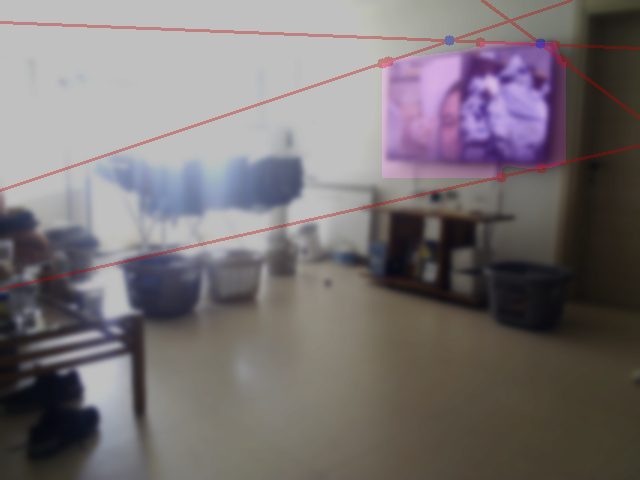


Stopped by user


In [35]:
import cv2
from ultralytics import YOLO
from IPython.display import display, clear_output
from PIL import Image
import numpy as np

# Load the YOLOv8n-seg model
model = YOLO('yolov8n-seg.pt')  # Use YOLOv8l-seg for better accuracy

# Open the USB camera (use the correct index for your camera)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open video device")
    cap.release()
    exit()

# Set the video frame width and height if needed
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

def preprocess_frame(frame, kernel_size=(15, 15), sigmaX=0, sigmaY=0):
    """
    Preprocess the frame by applying Gaussian blur with adjustable parameters.

    Args:
        frame (ndarray): The input frame.
        kernel_size (tuple): The size of the Gaussian kernel. Must be positive and odd (e.g., (5, 5)).
        sigmaX (float): Standard deviation in the X direction. If 0, it's calculated from the kernel size.
        sigmaY (float): Standard deviation in the Y direction. If 0, it uses the same value as sigmaX.

    Returns:
        ndarray: The preprocessed frame with Gaussian blur applied.
    """
    # Apply Gaussian Blur with adjustable parameters
    blurred_frame = cv2.GaussianBlur(frame, kernel_size, sigmaX, sigmaY)
    
    return blurred_frame

def extend_line_full_image(point1, point2, img_shape):
    """
    Extends a line fully across the image in both directions through point1 and point2.

    Args:
        point1 (tuple): The first point (x, y).
        point2 (tuple): The second point (x, y).
        img_shape (tuple): Shape of the image (height, width).

    Returns:
        tuple: Endpoints of the extended line.
    """
    h, w = img_shape[:2]
    
    if point1[0] == point2[0]:  # Vertical line
        return (point1[0], 0), (point1[0], h)
    
    if point1[1] == point2[1]:  # Horizontal line
        return (0, point1[1]), (w, point1[1])

    # Calculate slope
    slope = (point2[1] - point1[1]) / (point2[0] - point1[0])
    y_intercept = point1[1] - slope * point1[0]

    # Calculate intersections with image borders
    y0 = int(y_intercept)  # at x=0
    yW = int(slope * w + y_intercept)  # at x=width
    x0 = int(-y_intercept / slope)  # at y=0
    xH = int((h - y_intercept) / slope)  # at y=height

    points = []
    if 0 <= y0 <= h:
        points.append((0, y0))
    if 0 <= yW <= h:
        points.append((w, yW))
    if 0 <= x0 <= w:
        points.append((x0, 0))
    if 0 <= xH <= w:
        points.append((xH, h))

    # Return the two endpoints that are within the image bounds
    if len(points) == 2:
        return points[0], points[1]
    else:
        return points[0], points[1] if len(points) > 1 else (point1, point2)

def intersection_point(line1_start, line1_end, line2_start, line2_end):
    """
    Calculates the intersection point of two lines given their endpoints.

    Args:
        line1_start, line1_end (tuple): Endpoints of the first line.
        line2_start, line2_end (tuple): Endpoints of the second line.

    Returns:
        tuple: The intersection point as (x, y), or None if lines are parallel.
    """
    x1, y1 = line1_start
    x2, y2 = line1_end
    x3, y3 = line2_start
    x4, y4 = line2_end

    denominator = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denominator == 0:
        return None  # Lines are parallel

    px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denominator
    py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denominator
    return int(px), int(py)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture image")
            break
        
        preprocessed_frame = preprocess_frame(frame)
        frame = preprocessed_frame
        
        # Perform segmentation on the frame
        results = model(frame)
        
        # Create a copy of the frame to overlay the segmented area
        overlay = frame.copy()

        # Iterate over each detected object
        for i, detection in enumerate(results[0].boxes):
            # Check if the detected object is a "TV" (usually class ID 62)
            if detection.cls == 62:  # Assuming '62' is the class ID for "TV"
                
                # Retrieve the segmentation mask for the detected object
                mask = results[0].masks.data[i].cpu().numpy()  # Extract the actual mask data
                mask = (mask * 255).astype('uint8')  # Convert to uint8
                
                # Resize the mask to match the frame size
                mask = cv2.resize(mask, (frame.shape[1], frame.shape[0]), interpolation=cv2.INTER_NEAREST)

                # Find contours in the mask
                contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                # If contours are found, use the largest one (typically the object contour)
                if contours:
                    contour = max(contours, key=cv2.contourArea)

                    # Sort points along each side (for leftmost and rightmost, sort by y; for topmost and bottommost, sort by x)
                    x_sorted = sorted(contour, key=lambda p: p[0][0])  # Sort by x values
                    y_sorted = sorted(contour, key=lambda p: p[0][1])  # Sort by y values

                    # Determine the points for the lines
                    x_min_1, x_min_4 = tuple(x_sorted[0][0]), tuple(x_sorted[3][0]) if len(x_sorted) >= 10 else tuple(x_sorted[-1][0])
                    x_max_1, x_max_4 = tuple(x_sorted[-1][0]), tuple(x_sorted[-4][0]) if len(x_sorted) >= 10 else tuple(x_sorted[0][0])
                    y_min_1, y_min_4 = tuple(y_sorted[0][0]), tuple(y_sorted[3][0]) if len(y_sorted) >= 10 else tuple(y_sorted[-1][0])
                    y_max_1, y_max_4 = tuple(y_sorted[-1][0]), tuple(y_sorted[-4][0]) if len(y_sorted) >= 10 else tuple(y_sorted[0][0])

                    # Extend and draw lines across the image
                    line1_start, line1_end = extend_line_full_image(x_min_1, x_min_4, frame.shape)
                    line2_start, line2_end = extend_line_full_image(x_max_1, x_max_4, frame.shape)
                    line3_start, line3_end = extend_line_full_image(y_min_1, y_min_4, frame.shape)
                    line4_start, line4_end = extend_line_full_image(y_max_1, y_max_4, frame.shape)

                    cv2.line(overlay, line1_start, line1_end, (0, 0, 255), 2)  # Line for x min
                    cv2.line(overlay, line2_start, line2_end, (0, 0, 255), 2)  # Line for x max
                    cv2.line(overlay, line3_start, line3_end, (0, 0, 255), 2)  # Line for y min
                    cv2.line(overlay, line4_start, line4_end, (0, 0, 255), 2)  # Line for y max

                    # Mark the original extreme points with red dots
                    cv2.circle(overlay, x_min_1, 5, (0, 0, 255), -1)
                    cv2.circle(overlay, x_min_4, 5, (0, 0, 255), -1)
                    cv2.circle(overlay, x_max_1, 5, (0, 0, 255), -1)
                    cv2.circle(overlay, x_max_4, 5, (0, 0, 255), -1)
                    cv2.circle(overlay, y_min_1, 5, (0, 0, 255), -1)
                    cv2.circle(overlay, y_min_4, 5, (0, 0, 255), -1)
                    cv2.circle(overlay, y_max_1, 5, (0, 0, 255), -1)
                    cv2.circle(overlay, y_max_4, 5, (0, 0, 255), -1)

                    # Find and mark the intersections of the lines with blue dots
                    intersection1 = intersection_point(line1_start, line1_end, line3_start, line3_end)
                    intersection2 = intersection_point(line1_start, line1_end, line4_start, line4_end)
                    intersection3 = intersection_point(line2_start, line2_end, line3_start, line3_end)
                    intersection4 = intersection_point(line2_start, line2_end, line4_start, line4_end)

                    for intersection in [intersection1, intersection2, intersection3, intersection4]:
                        if intersection:
                            cv2.circle(overlay, intersection, 5, (255, 0, 0), -1)  # Blue dot for intersections

                    # Apply the purple color to the mask
                    purple_overlay = np.zeros_like(frame)
                    purple_overlay[mask > 0] = [128, 0, 128]  # Purple color (B, G, R)

                    # Combine the overlay with the original frame using transparency
                    alpha = 0.5  # Transparency factor
                    cv2.addWeighted(purple_overlay, alpha, overlay, 1 - alpha, 0, overlay)

        # Combine the overlay with the original frame
        final_frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)

        # Convert the final frame to RGB format (from BGR)
        final_frame_rgb = cv2.cvtColor(final_frame, cv2.COLOR_BGR2RGB)

        # Convert the frame to an Image object for display in Jupyter
        img_pil = Image.fromarray(final_frame_rgb)

        # Display the image in the notebook
        clear_output(wait=True)  # Clear previous output
        display(img_pil)  # Display the current frame

except KeyboardInterrupt:
    print("Stopped by user")

finally:
    # When everything is done, release the capture
    cap.release()


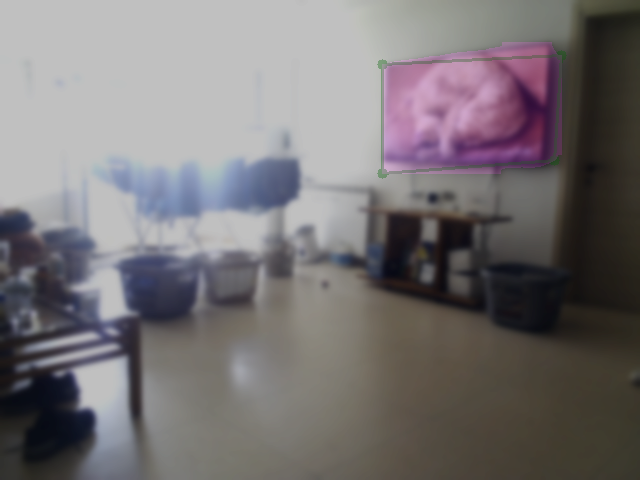

In [ ]:
import cv2
from ultralytics import YOLO
from IPython.display import display, clear_output
from PIL import Image
import numpy as np

# Load the YOLOv8n-seg model
model = YOLO('yolov8n-seg.pt')  # Use YOLOv8l-seg for better accuracy

# Open the USB camera (use the correct index for your camera)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open video device")
    cap.release()
    exit()

# Set the video frame width and height if needed
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

def preprocess_frame(frame, kernel_size=(15, 15), sigmaX=0, sigmaY=0):
    """
    Preprocess the frame by applying Gaussian blur with adjustable parameters.

    Args:
        frame (ndarray): The input frame.
        kernel_size (tuple): The size of the Gaussian kernel. Must be positive and odd (e.g., (5, 5)).
        sigmaX (float): Standard deviation in the X direction. If 0, it's calculated from the kernel size.
        sigmaY (float): Standard deviation in the Y direction. If 0, it uses the same value as sigmaX.

    Returns:
        ndarray: The preprocessed frame with Gaussian blur applied.
    """
    # Apply Gaussian Blur with adjustable parameters
    blurred_frame = cv2.GaussianBlur(frame, kernel_size, sigmaX, sigmaY)
    
    return blurred_frame

def simplify_polygon(contour, max_edges=5, epsilon_factor=0.03):
    """
    Simplify the polygon formed by a contour using the Ramer–Douglas–Peucker algorithm.

    Args:
        contour (ndarray): The contour to simplify.
        max_edges (int): The maximum number of edges the simplified polygon should have.
        epsilon_factor (float): The approximation accuracy factor. The smaller it is, the more precise the approximation.

    Returns:
        simplified_contour (ndarray): The simplified polygon contour.
    """
    epsilon = epsilon_factor * cv2.arcLength(contour, True)
    simplified_contour = cv2.approxPolyDP(contour, epsilon, True)

    # Increase epsilon until the polygon has max_edges or fewer
    while len(simplified_contour) > max_edges and epsilon < 1.0:
        epsilon += epsilon_factor * cv2.arcLength(contour, True)
        simplified_contour = cv2.approxPolyDP(contour, epsilon, True)

    return simplified_contour

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to capture image")
            break
        
        preprocessed_frame = preprocess_frame(frame)
        frame = preprocessed_frame
        
        # Perform segmentation on the frame
        results = model(frame)
        
        # Create a copy of the frame to overlay the segmented area
        overlay = frame.copy()

        largest_tv_area = 0
        largest_tv_mask = None

        # Iterate over each detected object
        for i, detection in enumerate(results[0].boxes):
            # Check if the detected object is a "TV" (usually class ID 62)
            if detection.cls == 62:  # Assuming '62' is the class ID for "TV"
                
                # Retrieve the segmentation mask for the detected object
                mask = results[0].masks.data[i].cpu().numpy()  # Extract the actual mask data
                mask = (mask * 255).astype('uint8')  # Convert to uint8
                
                # Resize the mask to match the frame size
                mask = cv2.resize(mask, (frame.shape[1], frame.shape[0]), interpolation=cv2.INTER_NEAREST)

                # Calculate the area of the mask (i.e., the number of white pixels)
                area = np.sum(mask > 0)

                # Keep track of the largest TV area and its mask
                if area > largest_tv_area:
                    largest_tv_area = area
                    largest_tv_mask = mask

        # Process only the largest TV detected
        if largest_tv_mask is not None:
            # Find contours in the mask
            contours, _ = cv2.findContours(largest_tv_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # If contours are found, use the largest one (typically the object contour)
            if contours:
                contour = max(contours, key=cv2.contourArea)

                # Simplify the contour to create a polygon with 5 edges or less
                simplified_contour = simplify_polygon(contour, max_edges=5)

                # Draw lines connecting the simplified polygon points
                for j in range(len(simplified_contour)):
                    pt1 = tuple(simplified_contour[j][0])
                    pt2 = tuple(simplified_contour[(j + 1) % len(simplified_contour)][0])
                    cv2.line(overlay, pt1, pt2, (0, 128, 0), 2)  # Draw polygon with dark green lines

                # Draw the simplified corners with dark green dots
                for corner in simplified_contour:
                    x, y = corner.ravel()
                    cv2.circle(overlay, (x, y), 5, (0, 128, 0), -1)  # Dark green dot for simplified corners

                # Apply the purple color to the mask
                purple_overlay = np.zeros_like(frame)
                purple_overlay[largest_tv_mask > 0] = [128, 0, 128]  # Purple color (B, G, R)

                # Combine the overlay with the original frame using transparency
                alpha = 0.5  # Transparency factor
                cv2.addWeighted(purple_overlay, alpha, overlay, 1 - alpha, 0, overlay)

        # Combine the overlay with the original frame
        final_frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)

        # Convert the final frame to RGB format (from BGR)
        final_frame_rgb = cv2.cvtColor(final_frame, cv2.COLOR_BGR2RGB)

        # Convert the frame to an Image object for display in Jupyter
        img_pil = Image.fromarray(final_frame_rgb)

        # Display the image in the notebook
        clear_output(wait=True)  # Clear previous output
        display(img_pil)  # Display the current frame

except KeyboardInterrupt:
    print("Stopped by user")

finally:
    # When everything is done, release the capture
    cap.release()
